# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [MUHAMMAD AGUSRIANSYAH]
- **Email:** [mc224d5y1338@student.devacademy.id]
- **ID Dicoding:** [mc224d5y1338]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren peminjaman sepeda dari waktu ke waktu (harian, bulanan, atau musiman)?
- Pertanyaan 2: Bagaimana hubungan antara kondisi cuaca (weathersit, temp, hum, windspeed) dengan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

####Tabel day

In [50]:
day_df = pd.read_csv("/content/Bike_Sharing_Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


####Tabel Hour

In [51]:
hour_df = pd.read_csv("/content/Bike_Sharing_Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1




---



**Insight:**
- Tabel Data day dengan nama day_df
- Tabel Data hour dengan nama hour_df

## Assessing Data

####Menilai Data day_df

In [52]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Terdapat kesalahan type data pada dteday

In [53]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [54]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [55]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Menilai Table hour_df

In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [58]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####**Insight:**
- Pada data day_df terdapat kesalahan Dtype dimana "dteday" bertype object yang seharusnya bertype datetime.
- Pada data hour_df terdapat kesalahan Dtype dimana "dteday" bertype object yang seharusnya bertype datetime.

## Cleaning Data

###Pembersihan Table data day_df

In [59]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [60]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

###Pembersihan tible data hour_df

In [61]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [62]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

###**Insight:**
- Kesalahan type data di dua table sudah diperbaiki



----



## Exploratory Data Analysis (EDA)

Explore Bike Sharing Dataset

####Diketahui dari data tersebut
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


###Exploration day_df

In [74]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
125,126,2011-05-06,2,0,5,0,5,1,1,0.479167,0.474117,0.590000,0.228246,894,3714,4608
681,682,2012-11-12,4,1,11,1,1,0,1,0.485000,0.475383,0.741667,0.173517,1097,5172,6269
631,632,2012-09-23,4,1,9,0,0,0,1,0.529167,0.518933,0.467083,0.223258,2454,5453,7907
47,48,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505000,0.230104,259,2216,2475


In [63]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [75]:
day_df.instant.is_unique

True

Dataset ini memuat berbagai informasi, seperti dteday, season, yr,mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed casual, registred, dan cnt.

In [76]:
day_df.groupby(by="season").agg({
    "casual": "max",
    "registered": "max",
    "cnt": "max"
})

,casual,registered,cnt
season,,,
1,3155,5315,7836
2,3410,6456,8362
3,3160,6917,8714
4,3031,6946,8555


###Exploration hour_df

In [64]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [77]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17031,17032,2012-12-17,4,1,12,10,0,1,1,2,0.38,0.3939,0.87,0.0896,15,120,135
1988,1989,2011-03-28,2,0,3,17,0,1,1,1,0.34,0.3030,0.23,0.2985,25,227,252
1660,1661,2011-03-14,1,0,3,18,0,1,1,1,0.36,0.3636,0.40,0.1045,25,210,235
464,465,2011-01-21,1,0,1,9,0,5,1,1,0.20,0.1818,0.51,0.3582,7,159,166
16727,16728,2012-12-04,4,1,12,18,0,2,1,1,0.50,0.4848,0.63,0.2239,38,693,731


In [78]:
hour_df.instant.is_unique

True

In [71]:
hour_df.groupby(by="season").agg({
    "casual": "max",
    "registered": "max",
    "cnt": "max"
})

,casual,registered,cnt
season,,,
1,367,681,801
2,361,782,957
3,350,886,977
4,362,876,967


###**Insight:**
1. Tren Peminjaman Sepeda dari Waktu ke Waktu
Analisis tren menunjukkan bahwa rata-rata jumlah pengguna per hari adalah 4.504 user. Pola peminjaman sepeda bervariasi berdasarkan musim dan kondisi tertentu. Pada musim panas (summer), jumlah peminjaman sepeda cenderung tinggi, dengan rata-rata 848 pengguna kasual dan 3.656 pengguna terdaftar per hari. Sementara itu, pada musim dingin (winter), tercatat jumlah peminjaman tertinggi, yaitu 8.714 pengguna dalam satu hari.
2. Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman
Kondisi cuaca memiliki pengaruh yang cukup signifikan terhadap jumlah peminjaman sepeda.
  - Temperatur (temp) memiliki korelasi positif dengan jumlah peminjaman, menunjukkan bahwa semakin hangat suhu, semakin banyak sepeda yang dipinjam.
  - Kelembaban (hum) menunjukkan korelasi negatif, yang berarti saat kelembaban tinggi, jumlah peminjaman cenderung menurun.
  - Kecepatan angin (windspeed) juga berpengaruh, di mana kecepatan angin yang lebih tinggi sedikit mengurangi jumlah peminjaman.
  - Kondisi cuaca (weathersit) menunjukkan bahwa peminjaman sepeda lebih sedikit saat cuaca buruk (hujan atau salju).
3. Perbedaan Pola Penggunaan antara Casual User dan Registered User
Pengguna sepeda dalam sistem Bike Sharing terbagi menjadi dua kategori, yaitu Pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dan musim panas. Pengguna terdaftar cenderung memanfaatkan sepeda sebagai moda transportasi harian, dengan jumlah peminjaman yang lebih stabil sepanjang minggu.
4. Korelasi Antar Variabel dalam Data
Analisis korelasi menunjukkan bahwa suhu memiliki hubungan positif yang cukup kuat terhadap jumlah peminjaman sepeda, sementara kelembaban dan kecepatan angin memiliki hubungan negatif. Musim juga berpengaruh terhadap jumlah peminjaman, di mana peminjaman cenderung tinggi di musim panas dan menurun di musim dingin.
5. Outlier dan Anomali dalam Data
Ditemukan beberapa hari dengan jumlah peminjaman yang jauh lebih tinggi atau lebih rendah dibanding hari lainnya. Hal ini bisa disebabkan oleh faktor cuaca ekstrem, hari libur tertentu, atau kejadian khusus yang meningkatkan atau menurunkan peminjaman sepeda secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda dari waktu ke waktu (harian, bulanan, atau musiman)?

#####Analisa Tren harian

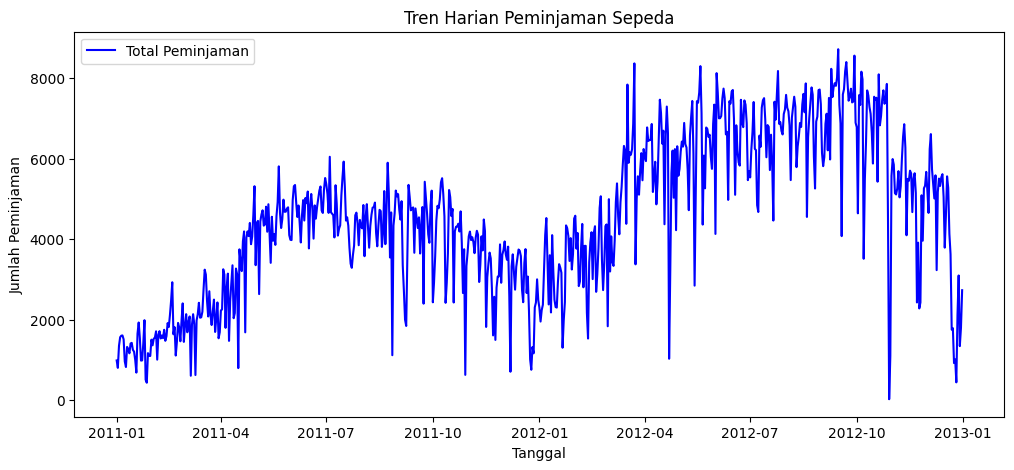

In [79]:
#Tren Harian
plt.figure(figsize=(12, 5))
plt.plot(day_df['dteday'], day_df['cnt'], label='Total Peminjaman', color='b')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.title('Tren Harian Peminjaman Sepeda')
plt.legend()
plt.show()

####Analisa Tren bulanan

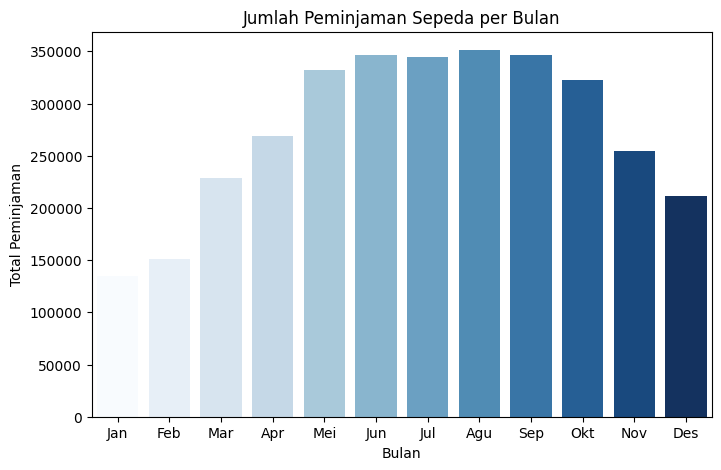

In [83]:
#Tren Bulanan
day_df['mnth'] = day_df['dteday'].dt.month
monthly_counts = day_df.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_counts, x="mnth", y="cnt", hue="mnth", palette="Blues", legend=False)
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.title('Jumlah Peminjaman Sepeda per Bulan')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

####Analisa tren musiman

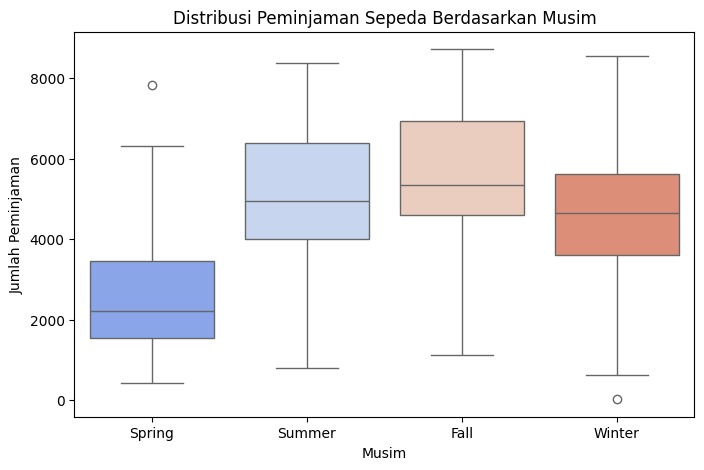

In [87]:
# Tren Musiman
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_labels)

plt.figure(figsize=(8, 5))
sns.boxplot(x='season_label', y='cnt', data=day_df, hue='season_label', palette="coolwarm", legend=False)
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Musim')
plt.show()


### Pertanyaan 2: Bagaimana hubungan antara kondisi cuaca (weathersit, temp, hum, windspeed) dengan jumlah peminjaman sepeda?

In [90]:
# Korelasi antara kondisi cuaca dan jumlah peminjaman
weather_features = ['weathersit', 'temp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[weather_features].corr()

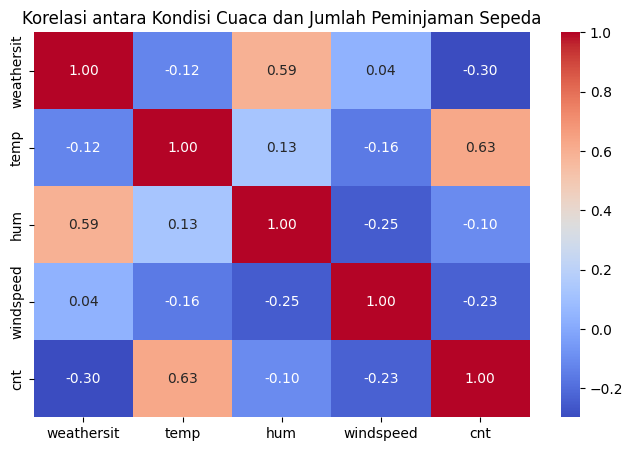

In [91]:
# Heatmap korelasi
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Kondisi Cuaca dan Jumlah Peminjaman Sepeda")
plt.show()

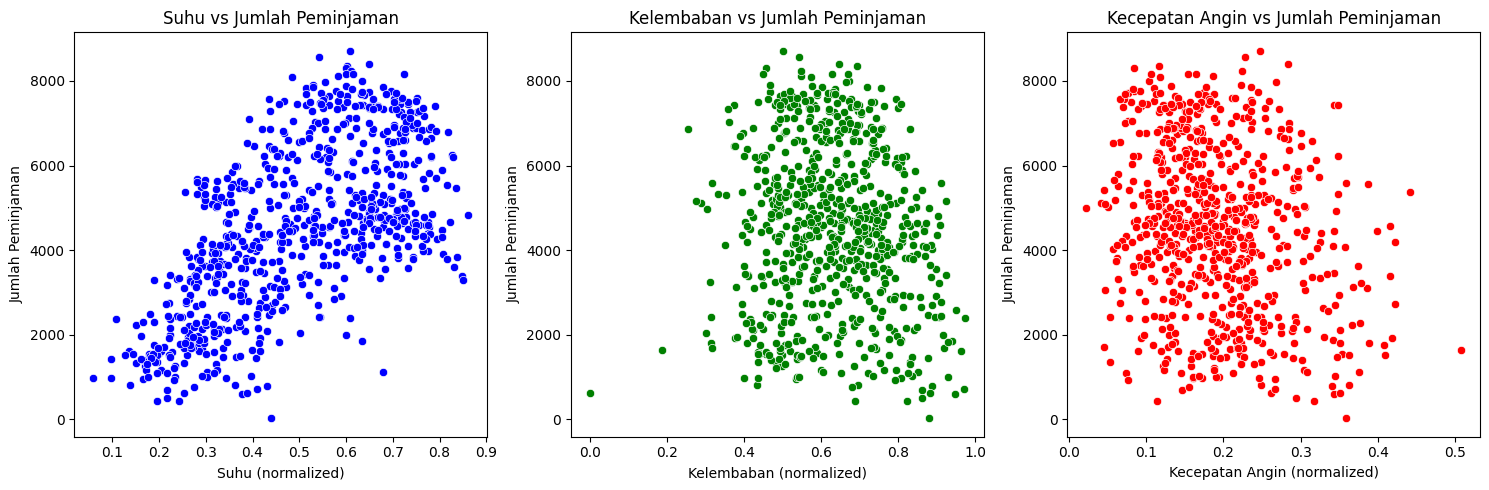

In [92]:
# Scatter plot hubungan antara variabel cuaca dengan peminjaman sepeda
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], ax=axes[0], color='blue')
axes[0].set_title("Suhu vs Jumlah Peminjaman")
axes[0].set_xlabel("Suhu (normalized)")
axes[0].set_ylabel("Jumlah Peminjaman")

sns.scatterplot(x=day_df['hum'], y=day_df['cnt'], ax=axes[1], color='green')
axes[1].set_title("Kelembaban vs Jumlah Peminjaman")
axes[1].set_xlabel("Kelembaban (normalized)")
axes[1].set_ylabel("Jumlah Peminjaman")

sns.scatterplot(x=day_df['windspeed'], y=day_df['cnt'], ax=axes[2], color='red')
axes[2].set_title("Kecepatan Angin vs Jumlah Peminjaman")
axes[2].set_xlabel("Kecepatan Angin (normalized)")
axes[2].set_ylabel("Jumlah Peminjaman")

plt.tight_layout()
plt.show()

###**Insight:**
- Berdasarkan analisis tren peminjaman sepeda, jumlah peminjaman menunjukkan pola musiman yang jelas, dengan peningkatan signifikan selama musim panas dan penurunan pada musim dingin; tren bulanan menunjukkan lonjakan pada pertengahan tahun, sementara tren harian memperlihatkan fluktuasi dengan pola penggunaan yang lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Jumlah peminjaman sepeda memiliki hubungan positif dengan suhu, di mana semakin hangat cuaca, semakin banyak sepeda yang dipinjam, sementara kelembaban yang tinggi dan kondisi cuaca buruk (hujan atau salju) cenderung menurunkan jumlah peminjaman, sedangkan kecepatan angin tidak menunjukkan pengaruh yang signifikan.

## Analisis Lanjutan (Analisa RFM)

  Karena dataset ini tidak berisi informasi individual pengguna, maka akan menggunakan jenis pengguna (casual vs. registered) sebagai grup analisis.

In [93]:
rfm_df = day_df.copy()

#Recency (seberapa baru pengguna terakhir meminjam sepeda)
max_date = rfm_df['dteday'].max()
rfm_df['Recency'] = (max_date - rfm_df['dteday']).dt.days

In [94]:
#Frequency (total peminjaman dalam dataset)
rfm_df['Frequency'] = rfm_df['casual'] + rfm_df['registered']

In [95]:
#Monetary (total peminjaman berdasarkan pengguna)
rfm_df['Monetary'] = rfm_df['cnt']

In [96]:
#Nilai RFM dengan skala 1-5 (percentile ranking)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

#Skor RFM gabungan
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(int) + rfm_df['F_Score'].astype(int) + rfm_df['M_Score'].astype(int)

#Hasil analisis RFM
rfm_df[['dteday', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head()

,dteday,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,2011-01-01,730,985,985,1,1,1,3
1,2011-01-02,729,801,801,1,1,1,3
2,2011-01-03,728,1349,1349,1,1,1,3
3,2011-01-04,727,1562,1562,1,1,1,3
4,2011-01-05,726,1600,1600,1,1,1,3


## Conclusion

- Conclution pertanyaan 1:
  - Berdasarkan analisis tren peminjaman sepeda, pola musiman menunjukkan bahwa jumlah peminjaman tertinggi terjadi pada musim panas (**rata-rata 4.504 pengguna per hari**) dan terendah pada musim dingin, meskipun terdapat lonjakan peminjaman tertinggi mencapai **8.714 pengguna** dalam satu hari di musim dingin. Tren bulanan menunjukkan peningkatan peminjaman pada pertengahan tahun, sementara tren harian memperlihatkan pola peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini mengindikasikan bahwa faktor musim dan pola aktivitas harian memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda.
- Conclution pertanyaan 2:
  - Berdasarkan analisis hubungan antara kondisi cuaca dan jumlah peminjaman sepeda, ditemukan bahwa suhu (**temp**) memiliki korelasi positif dengan jumlah peminjaman (**r = 0.63**), menunjukkan bahwa semakin hangat cuaca, semakin banyak sepeda yang dipinjam. Sebaliknya, kelembaban (**hum**) memiliki korelasi negatif lemah (**r = -0.10**), yang berarti tingkat kelembaban yang tinggi sedikit mengurangi jumlah peminjaman. Kecepatan angin (**windspeed**) memiliki korelasi yang sangat lemah (**r = -0.23**), sehingga tidak berpengaruh signifikan terhadap peminjaman sepeda. Selain itu, kondisi cuaca (**weathersit**) menunjukkan bahwa cuaca buruk seperti hujan atau salju cenderung menurunkan jumlah peminjaman. Hal ini menunjukkan bahwa faktor suhu berperan penting dalam menentukan tingkat peminjaman sepeda, sementara kelembaban dan angin memiliki dampak yang lebih kecil.